<a href="https://colab.research.google.com/github/Bhati0078/Real-estate-Pandas-pyspark-Visualization_Project/blob/main/Real_estate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

# Install pyspark If you do'nt have in your system
# !pip install pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [174]:
# Connect to an SQLite database; use ':memory:' for an in-memory database
conn = sqlite3.connect(':memory:')

In [175]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/real_estate_F.csv')
df.set_index('List_Year')

,Date,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type
List_Year,,,,,,,,
2020,14-04-2021,Ansonia,323 BEAVER ST,133000,248400.0,0.535400,Residential,Single Family
2020,26-05-2021,Ansonia,152 JACKSON ST,110500,239900.0,0.460600,Residential,Three Family
2020,14-12-2020,Ansonia,57 PLATT ST,127400,202500.0,0.629100,Residential,Two Family
2020,07-09-2021,Avon,245 NEW ROAD,217640,400000.0,0.544100,Residential,Single Family
2020,15-12-2020,Avon,63 NORTHGATE,528490,775000.0,0.681900,Residential,Single Family
...,...,...,...,...,...,...,...,...
2019,03-08-2020,Wilton,145 WHIPSTICK RD,681870,1134708.0,0.600900,Single Family,Single Family
2019,24-06-2020,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family
2019,27-11-2019,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family


In [176]:
# Convert the Pandas DataFrame to a PySpark DataFrame
df_spark = spark.createDataFrame(df)


In [229]:
# 1. What are the average assessed values and sale amounts for each town?
# Pandas
town_avg_assessed_value = df.groupby('Town')['Assessed_Value'].mean().sort_values(ascending=True)
print("***Town Wise Avg Assessed Value*** :" )
pd.DataFrame(town_avg_assessed_value)


***Town Wise Avg Assessed Value*** :


,Assessed_Value
Town,
Hartford,5.492691e+04
***Unknown***,6.654000e+04
Waterbury,8.486015e+04
Windham,9.307220e+04
New Britain,1.019346e+05
...,...
Weston,6.545756e+05
Westport,9.314172e+05
Darien,1.060332e+06


In [179]:
# PySpark
town_avg_assessed_value_spark = df_spark.groupBy('Town').agg({'Assessed_Value': 'avg'})
town_avg_sale_amount_spark = df_spark.groupBy('Town').agg({'Sale_Amount': 'avg'})
print("***Town Wise Avg Assessed Value*** :")
pd.DataFrame(town_avg_sale_amount)
town_avg_assessed_value_spark.show()
print("***Town Wise Avg Sales Amount*** :")
town_avg_sale_amount_spark.show()


***Town Wise Avg Assessed Value*** :
+-------------+-------------------+
|         Town|avg(Assessed_Value)|
+-------------+-------------------+
|  Middlefield| 179090.47730600293|
|    Bethlehem| 214070.69498069497|
|   Plainfield| 114871.76582038651|
|   Litchfield| 244007.58349086327|
|       Monroe|   250649.251663791|
|   Brookfield|  270094.2523989532|
|     Sterling| 136440.54802259887|
|       Bolton| 189114.31118881117|
| North Canaan|  142572.9919678715|
|Windsor Locks| 112683.42721758908|
|      Wolcott| 165773.28576248314|
|   Woodbridge| 310491.39451219514|
|     Cromwell| 156491.83506886126|
|     Franklin| 152709.55555555556|
|  New Milford| 201884.54069537733|
|     Guilford|  296887.8431284916|
|   Manchester|  132518.6399477238|
|  East Haddam| 177937.86051389616|
|    Thomaston|  136753.7260677467|
|    Stratford| 259814.00397953382|
+-------------+-------------------+
only showing top 20 rows

***Town Wise Avg Sales Amount*** :
+-------------+------------------+
|  

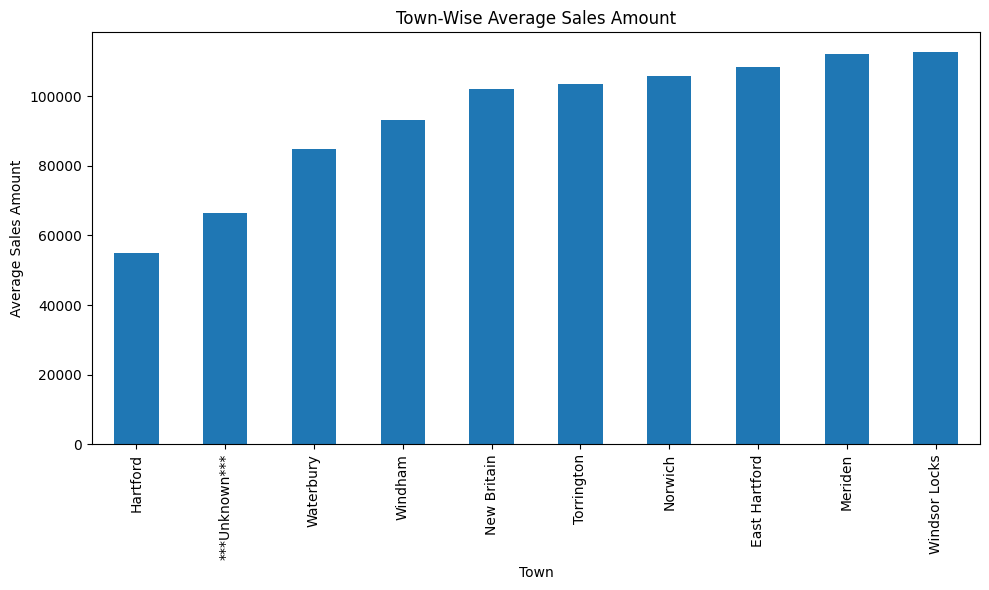

In [249]:
# Create a bar chart
plt.figure(figsize=(10, 6))
town_avg_assessed_value.head(10).plot(kind='bar', legend=False)
plt.title('Town-Wise Average Sales Amount')
plt.xlabel('Town')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [295]:
# 2. What is the most common property type?
# Pandas
most_common_property_type = df['Property_Type'].value_counts().mode()[0]
print("most_common_property_type_count :" , most_common_property_type)


most_common_property_type_count : 2150


In [293]:
# PySpark
most_common_property_type_spark = df_spark.groupBy('Property_Type').count().orderBy('count', descending=True).first()['Property_Type']
most_common_property_type_spark_count = df_spark.groupBy('Property_Type').count().orderBy('count', descending=True).first()['count']
print("The most common property type is:", most_common_property_type_spark ," & Count is :" ,most_common_property_type_spark_count)


The most common property type is: Four Family  & Count is : 2150


In [297]:
# 3. What is the median sale ratio for each residential type?
# Pandas
median_sale_ratio_by_residential_type = df.groupby('Residential_Type')['Sales_Ratio'].median()
print("***Median Sales Ratio***")
pd.DataFrame(median_sale_ratio_by_residential_type)


***Median Sales Ratio***


,Sales_Ratio
Residential_Type,
Condo,0.672109
Four Family,0.750574
Single Family,0.692100
Three Family,0.708600
Two Family,0.741900


In [183]:
# PySpark
median_sale_ratio_by_residential_type_spark = df_spark.groupBy('Residential_Type').agg({'Sales_Ratio': 'median'})
print("***Meadian Sales Ratio***")
median_sale_ratio_by_residential_type_spark.show()

***Meadian Sales Ratio***
+----------------+-------------------+
|Residential_Type|median(Sales_Ratio)|
+----------------+-------------------+
|     Four Family|        0.750573523|
|      Two Family|             0.7419|
|   Single Family|             0.6921|
|           Condo|        0.672108844|
|    Three Family|             0.7086|
+----------------+-------------------+



Text(0, 0.5, '')

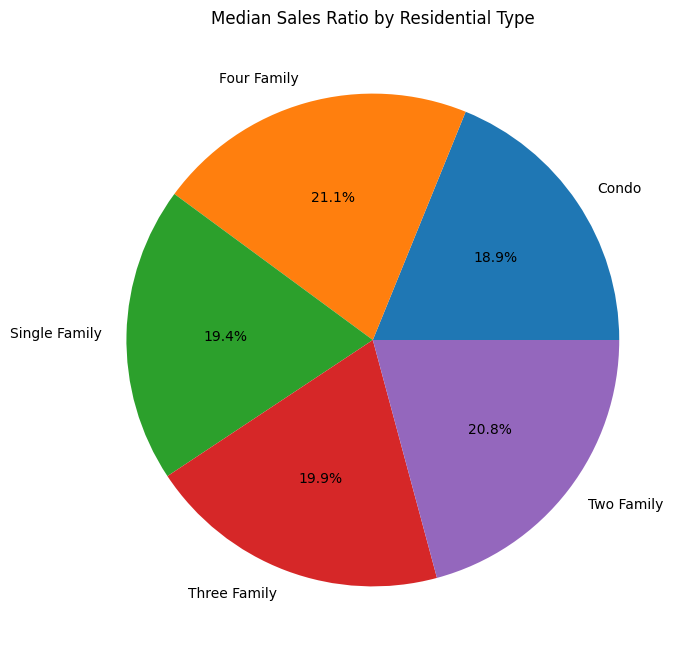

In [302]:
plt.figure(figsize=(8, 8))
median_sale_ratio_by_residential_type.plot(kind='pie',labels=median_sale_ratio_by_residential_type.index,autopct='%1.1f%%')
plt.title('Median Sales Ratio by Residential Type')
plt.ylabel('')
plt.show()

In [184]:
# 4. What is the correlation between assessed value and sale amount?
# Pandas
correlation = df['Assessed_Value'].corr(df['Sale_Amount'])
print("Correlation Between Assessed Value and Sale Amount :", correlation)

Correlation Between Assessed Value and Sale Amount : 0.15912173695556386


In [185]:
# PySpark
correlation_spark = df_spark.corr('Assessed_Value', 'Sale_Amount')
print("Correlation Between Assessed Value and Sale Amount :", correlation)

Correlation Between Assessed Value and Sale Amount : 0.15912173695556386


In [262]:
# 5. What are the top 10 most expensive properties sold in 2020?
# Pandas
top_10_most_expensive_properties = df.sort_values(by='Sale_Amount', ascending=False).head(10)
print("                                      \033[1m***Most Expensive Properties Sold in 2020***\033[0m")
pd.DataFrame(top_10_most_expensive_properties)

                                      ***Most Expensive Properties Sold in 2020***


,List_Year,Date,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type
55309,2020,06-07-2021,Willington,224 RIVER ROAD,223070,318790019.0,0.000700,Residential,Single Family
59610,2020,28-09-2021,Willington,7 TOLLAND TURNPIKE ROAD,112040,194149073.0,0.000577,Residential,Three Family
572200,2019,12-08-2020,Norwalk,33 ORCHARD ST,507580,157000000.0,0.003200,Four Family,Four Family
295360,2013,11-04-2014,Greenwich,499 INDIAN FIELD ROAD,15025570,120000000.0,0.125213,Single Family,Single Family
34448,2020,15-01-2021,Stamford,93 GLENBROOK ROAD GARAGE #2,6970,72000000.0,0.000000,Residential,Condo
26622,2020,15-01-2021,Stamford,93 GLENBROOK ROAD #209,114140,72000000.0,0.001500,Residential,Condo
36259,2020,15-01-2021,Stamford,93 GLENBROOK ROAD #213,118470,72000000.0,0.001600,Residential,Condo
29864,2020,15-01-2021,Stamford,93 GLENBROOK ROAD #205,115550,72000000.0,0.001600,Residential,Condo
43823,2020,15-01-2021,Stamford,93 GLENBROOK ROAD #211,129330,72000000.0,0.001700,Residential,Condo
36041,2020,15-01-2021,Stamford,93 GLENBROOK ROAD #215,135880,72000000.0,0.001800,Residential,Condo


In [187]:
# PySpark
# Sort the filtered DataFrame in descending order based on 'Sale_Amount' and limit to the top 10
top_10_most_expensive_properties_spark = df_spark.orderBy('Sale_Amount',descending=True).limit(10)
print("                                      \033[1m***Top 10 Sales***\033[0m")

top_10_most_expensive_properties_spark.show()

                                      ***Top 10 Sales***
+---------+----------+----------+--------------------+--------------+-----------+-----------+-------------+----------------+
|List_Year|     Date |      Town|             Address|Assessed_Value|Sale_Amount|Sales_Ratio|Property_Type|Residential_Type|
+---------+----------+----------+--------------------+--------------+-----------+-----------+-------------+----------------+
|     2007|14-11-2007| Montville|61 RICHARD BROWN DR.|        197920|        0.0|        0.0|Single Family|   Single Family|
|     2017|22-11-2017|Manchester|   155 FERGUSON ROAD|        141800|        0.0|        0.0|Single Family|   Single Family|
|     2012|17-12-2012|    Lisbon|      98 SULLIVAN RD|        159770|        0.0|        0.0|Single Family|   Single Family|
|     2017|11-04-2018| Newington| 188 BUENA VISTA AVE|         72880|        0.0|        0.0|Single Family|   Single Family|
|     2006|08-08-2007| Stratford|       STONYBROOK RD|      19110000

<Figure size 1000x600 with 0 Axes>

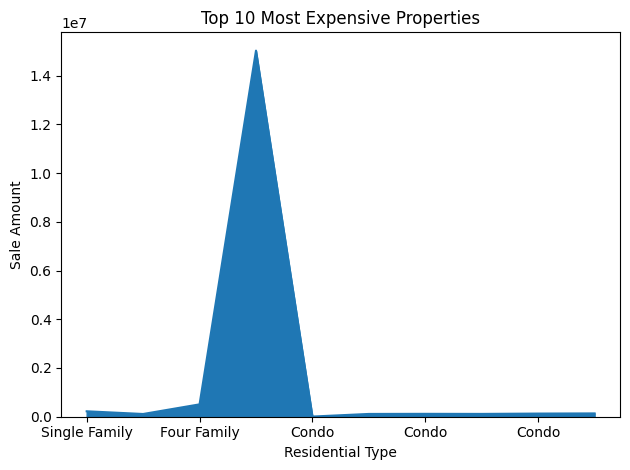

In [304]:
# Create an area plot
plt.figure(figsize=(10, 6))
top_10_most_expensive_properties.plot.area(x='Residential_Type', y='Assessed_Value', legend=False)

# Add labels and title
plt.title('Top 10 Most Expensive Properties')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')

# Show the area plot
plt.tight_layout()
plt.show()

In [306]:
# 6. What is the distribution of sale ratios for each town?
# Pandas
Distribution=df.groupby('Property_Type')['Sales_Ratio'].describe()
Distribution

,count,mean,std,min,25%,50%,75%,max
Property_Type,,,,,,,,
Condo,105419.0,0.859682,7.166527,0.0,0.587100,0.686108,0.810000,2.106697e+03
Four Family,2150.0,1.421730,4.410858,0.0,0.569736,0.795802,1.400000,1.825040e+02
Residential,60728.0,0.703482,3.087426,0.0,0.484500,0.556300,0.638200,2.135675e+02
Single Family,401610.0,8.115120,2217.066858,0.0,0.611775,0.705600,0.854600,1.226420e+06
Three Family,12586.0,1.444156,3.835679,0.0,0.519508,0.766568,1.351676,1.453200e+02
Two Family,26407.0,1.213065,2.477446,0.0,0.584638,0.782012,1.241323,1.390667e+02


In [307]:
# 7. What is the relationship between sale ratio and property type?
# Pandas
sale_ratio_by_property_type = df.groupby('Property_Type')['Sales_Ratio'].describe()
sale_ratio_by_property_type

,count,mean,std,min,25%,50%,75%,max
Property_Type,,,,,,,,
Condo,105419.0,0.859682,7.166527,0.0,0.587100,0.686108,0.810000,2.106697e+03
Four Family,2150.0,1.421730,4.410858,0.0,0.569736,0.795802,1.400000,1.825040e+02
Residential,60728.0,0.703482,3.087426,0.0,0.484500,0.556300,0.638200,2.135675e+02
Single Family,401610.0,8.115120,2217.066858,0.0,0.611775,0.705600,0.854600,1.226420e+06
Three Family,12586.0,1.444156,3.835679,0.0,0.519508,0.766568,1.351676,1.453200e+02
Two Family,26407.0,1.213065,2.477446,0.0,0.584638,0.782012,1.241323,1.390667e+02


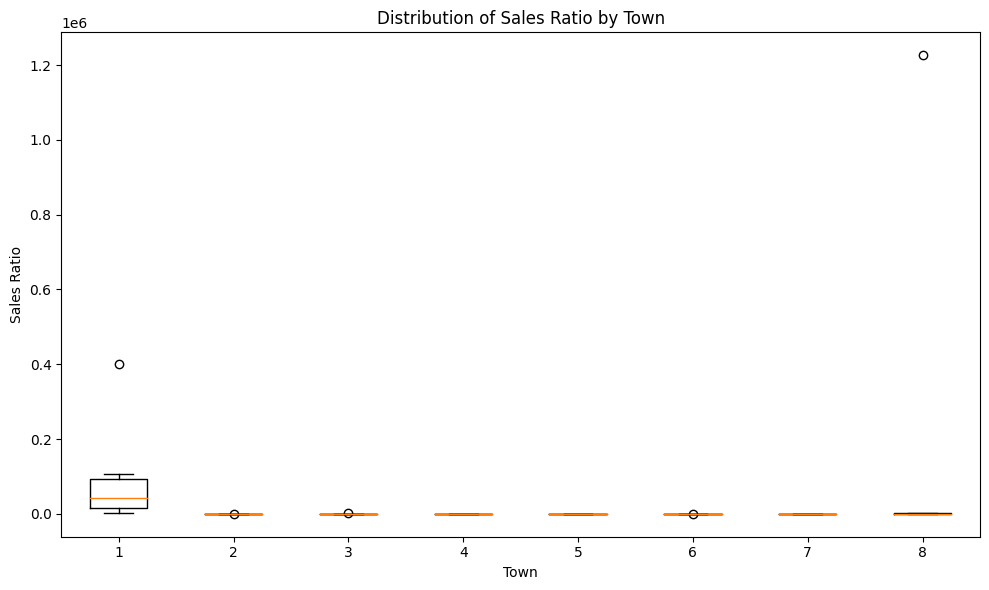

In [308]:
# Create a box plot for the 'Sales_Ratio' by 'Town'
plt.figure(figsize=(10, 6))
plt.boxplot(Distribution)

# Set labels and title
plt.title('Distribution of Sales Ratio by Town')
plt.xlabel('Town')
plt.ylabel('Sales Ratio')

# Show the box plot
plt.tight_layout()
plt.show()

In [190]:
# PySpark

# sale_ratio_by_property_type_spark = df_spark.groupBy('Property_Type').agg({'Sales_Ratio': 'describe'})

# Corrected code to calculate specific statistics on 'Sales_Ratio' column grouped by 'Property_Type'
sale_ratio_by_property_type_spark = df_spark.groupBy('Property_Type').agg(
    {
        'Sales_Ratio': 'mean',  # Calculate mean (average)
        'Sales_Ratio': 'stddev',  # Calculate standard deviation
        'Sales_Ratio': 'min',  # Calculate minimum value
        'Sales_Ratio': 'max'  # Calculate maximum value
    }
)
sale_ratio_by_property_type_spark.collect()

[Row(Property_Type='Four Family', max(Sales_Ratio)=182.504),
 Row(Property_Type='Residential', max(Sales_Ratio)=213.5675),
 Row(Property_Type='Two Family', max(Sales_Ratio)=139.0666667),
 Row(Property_Type='Single Family', max(Sales_Ratio)=1226420.0),
 Row(Property_Type='Condo', max(Sales_Ratio)=2106.696667),
 Row(Property_Type='Three Family', max(Sales_Ratio)=145.32)]

In [282]:
# 8. What is the trend of sale ratios over time?
# Pandas
sale_ratio_trend = df.groupby('List_Year')['Sales_Ratio'].mean()
print("Trend of Sale Ratios by Years")
pd.DataFrame(sale_ratio_trend)

Trend of Sale Ratios by Years


,Sales_Ratio
List_Year,
2006,57.436144
2007,0.869047
2008,1.061983
2009,1.182156
2010,1.238160
2011,1.268305
2012,1.091023
2013,1.099257
2014,0.975433


In [192]:
# PySpark
sale_ratio_trend_spark = df_spark.groupBy('List_Year').agg({'Sales_Ratio': 'avg'})
print("Trend of Sale Ratios by Years")
sale_ratio_trend_spark.show()

Trend of Sale Ratios by Years
+---------+------------------+
|List_Year|  avg(Sales_Ratio)|
+---------+------------------+
|     2007|0.8690471168679808|
|     2014|0.9754325345578775|
|     2012|  1.09102267412333|
|     2016|1.1708802509670246|
|     2018| 9.090126144813514|
|     2009|1.1821562586547774|
|     2010| 1.238159742929252|
|     2006| 57.43614403938443|
|     2017| 1.432510018442054|
|     2013|1.0992572118506003|
|     2011|1.2683048792061442|
|     2020|0.7034823141552401|
|     2019|0.7757041850910473|
|     2008|1.0619831610877637|
|     2015| 0.924791697859542|
+---------+------------------+



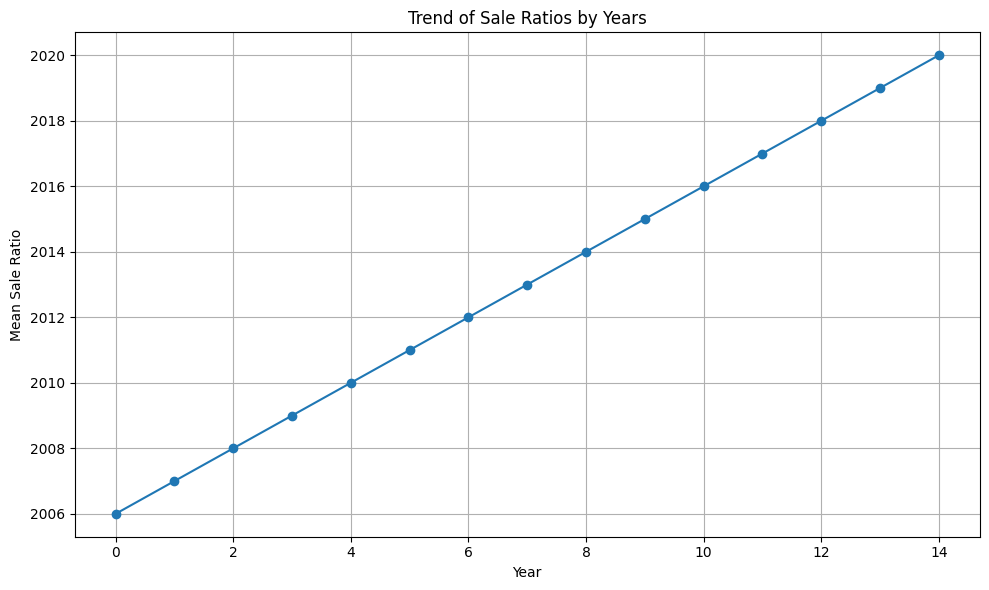

In [284]:
plt.figure(figsize=(10, 6))
plt.plot(sale_ratio_trend.index, marker='o', linestyle='-')

# Add labels and title
plt.title('Trend of Sale Ratios by Years')
plt.xlabel('Year')
plt.ylabel('Mean Sale Ratio')

# Show the line plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [193]:
# 9. What are the top 10 most profitable neighborhoods in terms of sale ratio?
# Pandas
top_10_most_profitable_neighborhoods = df.groupby('Town')['Sales_Ratio'].mean().sort_values(ascending=False).head(10)
pd.DataFrame(top_10_most_profitable_neighborhoods)

,Sales_Ratio
Town,
Salisbury,1428.942295
Beacon Falls,318.230652
Newtown,158.497424
Mansfield,65.871467
Haddam,60.232927
Guilford,45.430104
Plymouth,5.614650
Stratford,3.486676
Washington,2.102031


In [194]:
# PySpark
top_10_most_profitable_neighborhoods_spark = df_spark.groupBy('Town').agg({'Sales_Ratio': 'avg'}).orderBy('avg(Sales_Ratio)', descending=True).limit(10)
top_10_most_profitable_neighborhoods_spark.show()

+-------------+-------------------+
|         Town|   avg(Sales_Ratio)|
+-------------+-------------------+
|***Unknown***|        0.235581519|
|     Hartford|0.49503297908251215|
|    Newington| 0.7073105125056066|
|   Colchester| 0.7175597480253357|
|     Simsbury| 0.7239130365870983|
|Windsor Locks| 0.7245645303529188|
|       Orange| 0.7466071274815368|
|West Hartford|  0.749553999029122|
|South Windsor| 0.7531895760052301|
|      Windsor| 0.7573389011283259|
+-------------+-------------------+



In [310]:
# 10. What are the top 10 most expensive streets in terms of median sale price?
# Python
top_10_most_profitable = df.groupby('Town')['Sale_Amount'].median().sort_values(ascending=False).head(10)
pd.DataFrame(top_10_most_profitable)

,Sale_Amount
Town,
Greenwich,1393625.0
Darien,1325000.0
New Canaan,1275000.0
Westport,1100000.0
Weston,819900.0
Wilton,757000.0
Roxbury,635000.0
Ridgefield,625000.0
Easton,595000.0


In [311]:

top_10_most_profitable_neighborhoods_spark = df_spark.groupBy('Town') \
    .agg(median('Sale_Amount').alias('median_sales_ratio')) \
    .orderBy(desc('median_sales_ratio')) \
    .limit(10)
top_10_most_profitable_neighborhoods_spark.show()

+----------+------------------+
|      Town|median_sales_ratio|
+----------+------------------+
| Greenwich|         1393625.0|
|    Darien|         1325000.0|
|New Canaan|         1275000.0|
|  Westport|         1100000.0|
|    Weston|          819900.0|
|    Wilton|          757000.0|
|   Roxbury|          635000.0|
|Ridgefield|          625000.0|
|    Easton|          595000.0|
|   Redding|          550000.0|
+----------+------------------+



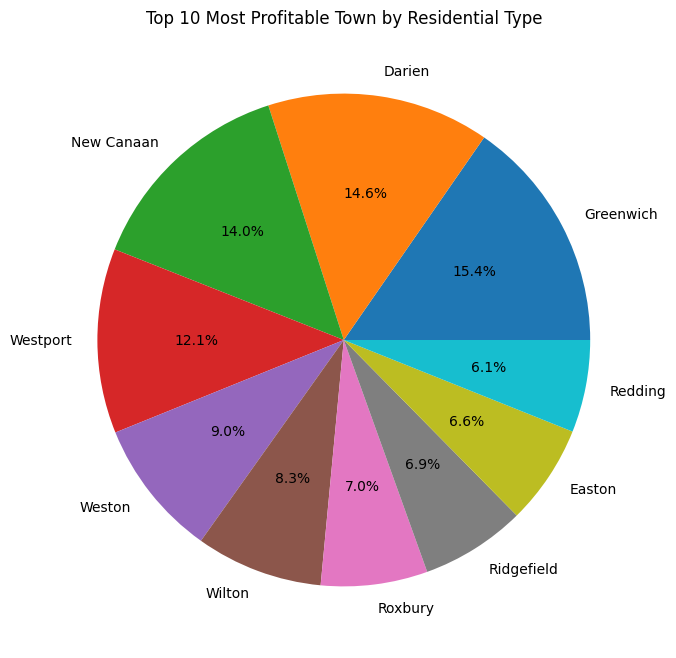

In [312]:
plt.figure(figsize=(8, 8))
top_10_most_profitable.plot(kind='pie',labels=top_10_most_profitable.index,autopct='%1.1f%%')
plt.title('Top 10 Most Profitable Town by Residential Type')
plt.ylabel('')
plt.show()